<a href="https://colab.research.google.com/github/GraceHerchenroder/Neuro265/blob/main/homework/coding_homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #2

**Instructions:**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Make a *Code Cell* that imports <code>numpy</code> as <code>np</code>, <code>matplotlib.pyplot</code> as <code>plt</code>, <code>statistics</code> as <code>st</code>.

3. Make a *Code Cell* that imports your <code>v_rest_sst.csv</code> and <code>v_rest_pvalb.csv</code> files as <code>numpy</code> arrays called <code>v_rest1</code> and <code>v_rest2</code> respectively. You're used to doing this with the <code>pd.read_csv</code> function for <code>pandas</code>, but can accomplish the same thing using the <code>np.loadtxt</code> function for <code>numpy</code>.

4. Make a *Code Cell* that concatenates <code>v_rest_sst</code> and <code>v_rest_pvalb</code> into a matrix with 2 rows and 13 columns named <code>v_rest</code>.

5. Make a *Code Cell* that prints the <code>size</code> of <code>v_rest</code>.

6. Make a *Code Cell* that returns the first row of <code>v_rest</code>.

7. Make a *Code Cell* that returns the sum of the values in the third column of <code>v_rest</code>. You can accomplish this by using <code>v_rest[].sum()</code>, with your index inside of the brackets. As an example, if I wanted to return the sum of the first row of <code>v_rest</code>, I could use <code>v_rest[0].sum()</code> to get my answer.

8. Make a *Code Cell* that returns the second-to-last value in the second row of <code>v_rest</code> (use negative indexing for the column value).

9. Create a *Code Cell* that makes a histogram of the values in the first row of <code>v_rest</code> (you can do this by using the <code>plt.hist()</code> function). Label your axes.

10. Create a *Code Cell* that takes the mean of the values in the first row of <code>v_rest</code>, and assigns the mean to a variable called <code>v_rest_mean_sst</code>. Do the same thing for the second row of <code>v_rest</code>, and assign the mean value of the second row to a variable called <code>v_rest_mean_pvalb</code>. You can get the means by using the <code>st.mean()</code> function (remember to put what you want the mean *of* inside the parentheses of the function).

11. Create a *Markdown Cell* that describes the difference in means between the two rows. Which one is bigger?

12. How can we test whether the difference in means is *meaningful* (statistically significant)? When we're comparing two means, we can use a t-test (assuming the data are normally distributed). To use a t-test on our data, we will first need to import the <code>scipy</code> package. Create a new *Code Cell* that runs the following:

<code>
import scipy.stats as stats
</code>

13. Now, we can perform a t-test on the two rows of <code>v_rest</code>. To do this, create a new *Code Cell* that uses the <code>stats.ttest_ind()</code> function - for example:

<code>
stats.ttest_ind(row1, row2)
</code>

Replace <code>row1</code> and <code>row2</code> in this case with the first and second rows, respectively, of <code>v_rest</code>.

14. Make a *Markdown Cell* that describes the results of your t-test. You should have <code>statistic</code> variable and a <code>pvalue</code> variable. The way to interpret your p-value is as a probability - specifically, the probability that the mean of one distribution could be found in the second distribution. Typically, results are considered to be "statistically significant" if the probability is lower than 5% - or 0.05. What is your p-value? Based on this p-value, do you think it is likely that the means are significantly different, or do you think it is likely that they are not?

15. Make sure to add at least one line with a <code>#</code> in front of it to each *Code Cell* to describe what each cell does.

15. Save a copy of this notebook to your GitHub repo with the title "coding_homework_2.ipynb".

### Grace Herchenroder
*Neuro265: Neural Data Analysis*

**February 16, 2024**

In [44]:
# Import packages for future code

import numpy as np
import statistics as st
import matplotlib.pyplot as plt

In [45]:
# Import datasets as numpy arrays

sst_url = 'https://raw.githubusercontent.com/GraceHerchenroder/Neuro265/main/homework/v_rest_sst.csv'
v_rest1 = np.loadtxt(sst_url)
v_rest1 = v_rest1.reshape(-1, 1)

pvalb_url = 'https://raw.githubusercontent.com/GraceHerchenroder/Neuro265/main/homework/v_rest_pvalb.csv'
v_rest2 = np.loadtxt(pvalb_url)
v_rest2 = v_rest2.reshape(-1, 1)

In [46]:
# Concatenate v_rest1 and v_rest2 into one matrix (2, 500)
v_rest = np.concatenate([v_rest1, v_rest2], axis = 1)
v_rest = v_rest.T
print(v_rest.shape)

(2, 500)


In [47]:
# Size of v_rest
v_rest.size

1000

In [50]:
# First row of v_rest (sst)
print(v_rest[0])

[-68.24292501 -69.60158234 -76.03420105 -71.16118393 -76.35402679
 -70.89105013 -64.11880341 -72.8632112  -78.96890068 -55.4531032
 -60.98506045 -66.61118807 -67.08294233 -73.90523593 -74.63317594
 -49.27067811 -76.05053997 -65.45417595 -58.53314018 -66.28985665
 -64.09106996 -71.49303228 -65.11718958 -73.74140637 -74.81462097
 -71.32343356 -74.46990373 -65.03939126 -71.94757271 -73.42034054
 -71.10602856 -61.28795481 -73.79654069 -64.48533249 -69.65824959
 -73.71225967 -85.56860669 -57.49219704 -76.91730436 -62.61127641
 -67.08071963 -78.45983535 -78.87342682 -76.14055703 -62.40101166
 -72.41336346 -62.03701146 -63.30990855 -62.02654052 -73.0206111
 -63.11713295 -70.05060087 -75.7537974  -57.15310111 -72.52368011
 -70.86691952 -65.435009   -66.87690226 -70.79107895 -71.34088898
 -65.70912288 -64.45794886 -62.82061958 -65.03326961 -61.37704976
 -71.51313705 -71.54903143 -83.53790652 -68.49228492 -69.6041454
 -62.87747123 -74.85636139 -54.73170166 -77.69460564 -64.62669296
 -69.86093764

In [53]:
# Summing the values in the 3rd column
print(v_rest[:,2].sum())

-151.75359464


In [56]:
# Print the second to last value in the second row of v_rest
print(v_rest[1, -2])

-49.80412917


Text(0, 0.5, 'ISI')

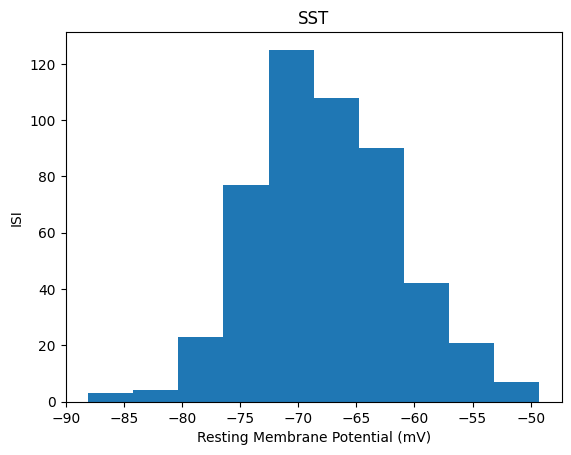

In [59]:
# Making a histogram for the first row of values
plt.hist(v_rest[0])
plt.title('SST')
plt.xlabel('Resting Membrane Potential (mV)')
plt.ylabel('ISI')

In [62]:
# Find the mean value of the first and second rows
v_rest_mean_sst = st.mean(v_rest[0])
print(v_rest_mean_sst)

v_rest_mean_pvalb = st.mean(v_rest[1])
print(v_rest_mean_pvalb)

-67.73465864056
-69.97869017908


###Mean Comparison

The SST neurons have a greater mean resting membrane potential than the pvalb neurons. This means that the SST neurons resting membrane potential is less negative. The difference between the means is *approximately 2.2 mV*. Without doing any statistics on these values, they do not appear to be very statistically different as they both fall in the high -60 mV range.

In [65]:
# Importing another package to do statistic
import scipy.stats as stats

In [66]:
# Performing t-test on the two rows of v_rest
stats.ttest_ind(v_rest[0], v_rest[1])

TtestResult(statistic=5.837507010328816, pvalue=7.159828660199036e-09, df=998.0)

### T-Test

The t-test performed in the previous code cell provides the following information:

*   statistic variable = 5.8375
*   pvalue = 7.16 * 10$^-$$^9$

The pvalue is indicitive of the statistical importance of the relationship. It says that the the probability of v_rest row 1 (sst) being found in v_rest row 2 (pvalb), or vise versa, is 0.000000716%. These results, therefore, indicate **statistical significance** as the value is much less that 5% (pvalue < 0.05). This value seems extremely low, but this makes more sense when considering the length of each distribution (500 values).

